In [1]:
import pandas as pd 
import numpy as np 
import pyodbc 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-BR91326\SQLEXPRESS;'
    'DATABASE=Instant;'
    'Trusted_Connection=yes;'
)
conn = pyodbc.connect(conn_str)
query = "SELECT * FROM shopping_trends"
df = pd.read_sql(query, conn)
df.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
df.shape

(3900, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_USD       3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

In [5]:
df.isnull().sum()

Customer_ID                 0
Age                         0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount_USD         0
Location                    0
Size                        0
Color                       0
Season                      0
Review_Rating               0
Subscription_Status         0
Payment_Method              0
Shipping_Type               0
Discount_Applied            0
Promo_Code_Used             0
Previous_Purchases          0
Preferred_Payment_Method    0
Frequency_of_Purchases      0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,Customer_ID,Age,Purchase_Amount_USD,Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [8]:
for col in ['Gender', 'Category', 'Size', 'Color', 'Season', 'Payment_Method']:
    print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Female']
Category: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']
Size: ['L' 'S' 'M' 'XL']
Color: ['Gray' 'Maroon' 'Turquoise' 'White' 'Charcoal' 'Silver' 'Pink' 'Purple'
 'Olive' 'Gold' 'Violet' 'Teal' 'Lavender' 'Black' 'Green' 'Peach' 'Red'
 'Cyan' 'Brown' 'Beige' 'Orange' 'Indigo' 'Yellow' 'Magenta' 'Blue']
Season: ['Winter' 'Spring' 'Summer' 'Fall']
Payment_Method: ['Credit Card' 'Bank Transfer' 'Cash' 'PayPal' 'Venmo' 'Debit Card']


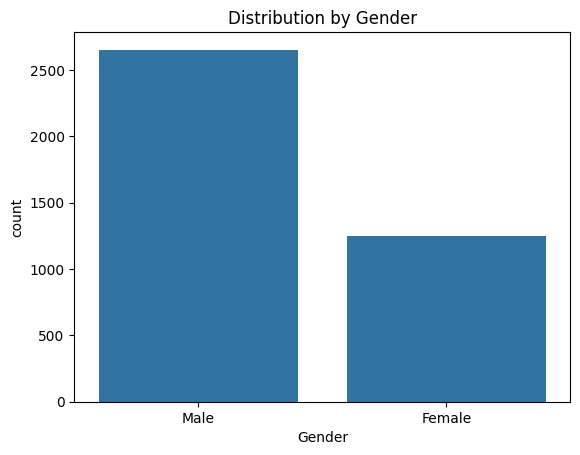

In [9]:
sns.countplot(data=df, x='Gender')
plt.title('Distribution by Gender')
plt.show()

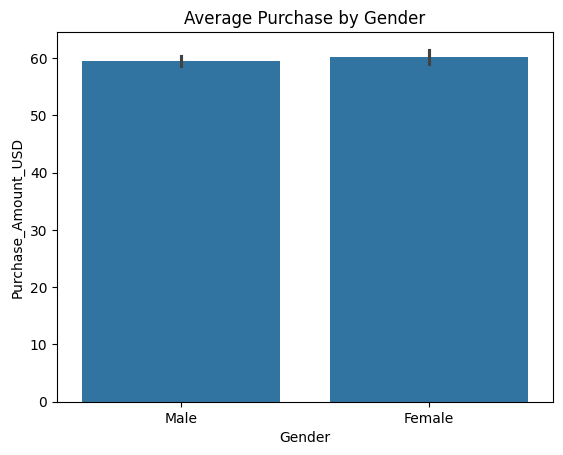

In [10]:
sns.barplot(data=df, x='Gender', y='Purchase_Amount_USD')
plt.title('Average Purchase by Gender')
plt.show()

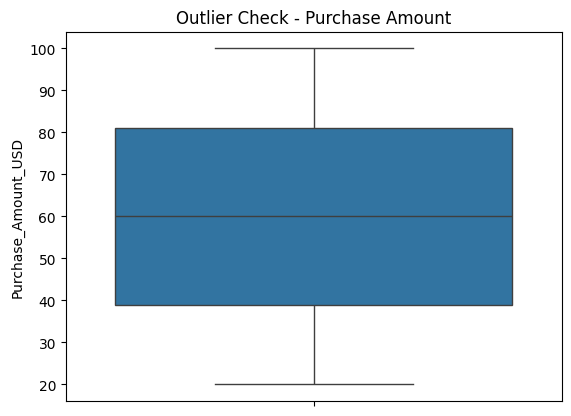

In [11]:
sns.boxplot(df['Purchase_Amount_USD'])
plt.title("Outlier Check - Purchase Amount")
plt.show()

In [12]:
bins = [0, 18, 30, 45, 60, 100]
labels = ["Teen", "Young Adult", "Adult", "Middle Age", "Senior"]
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels)

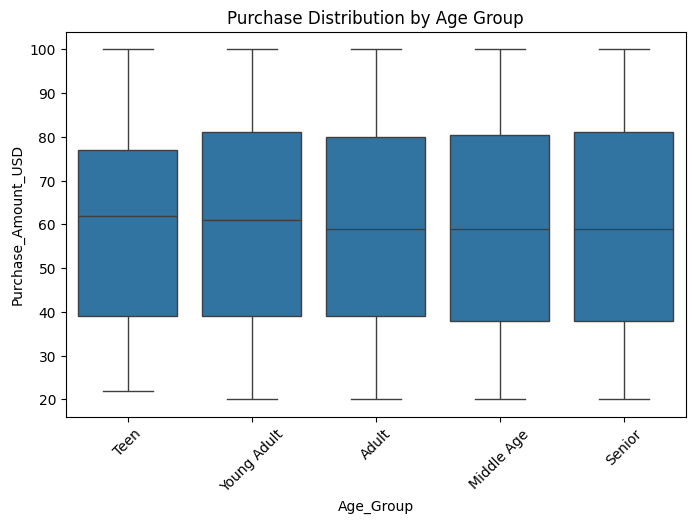

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Age_Group", y="Purchase_Amount_USD")
plt.title("Purchase Distribution by Age Group")
plt.xticks(rotation=45)
plt.show()

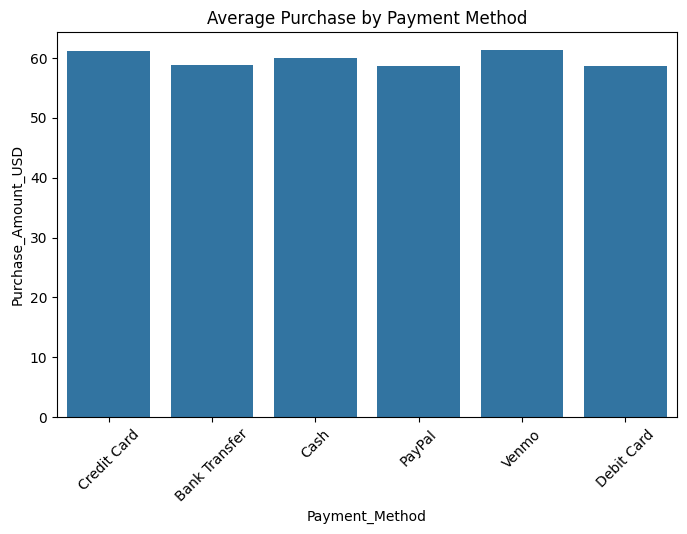

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Payment_Method", y="Purchase_Amount_USD", ci=None)
plt.title("Average Purchase by Payment Method")
plt.xticks(rotation=45)
plt.show()


In [15]:
purchase_per_customer = df.groupby('Customer_ID')['Purchase_Amount_USD'].sum().reset_index(name='Total_Spent')
df = df.merge(purchase_per_customer, on='Customer_ID', how='left')

In [16]:
df['Spending_Level'] = pd.qcut(df['Total_Spent'], q=3, labels=['Low', 'Medium', 'High'])

print(df[['Customer_ID', 'Total_Spent', 'Spending_Level']].drop_duplicates().head())

   Customer_ID  Total_Spent Spending_Level
0            1           53         Medium
1            2           64         Medium
2            3           73         Medium
3            4           90           High
4            5           49         Medium


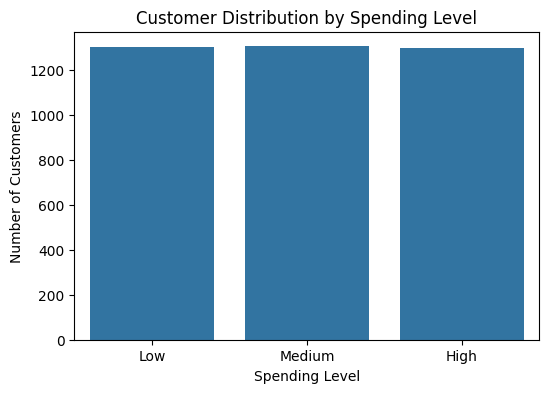

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(data=df.drop_duplicates('Customer_ID'), x='Spending_Level', order=['Low', 'Medium', 'High'])
plt.title('Customer Distribution by Spending Level')
plt.xlabel('Spending Level')
plt.ylabel('Number of Customers')
plt.show()

In [18]:
df['Used_Promo'] = df['Promo_Code_Used'].map({'Yes': 1, 'No': 0})

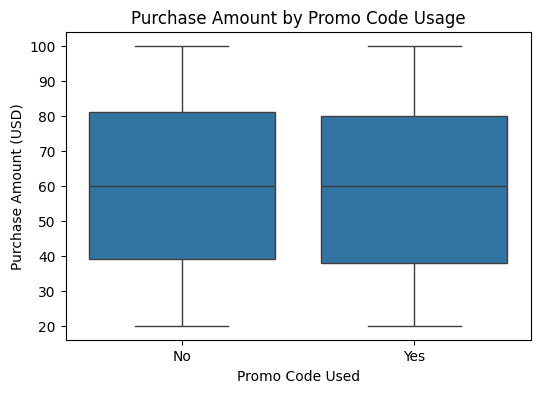

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Used_Promo', y='Purchase_Amount_USD')
plt.title("Purchase Amount by Promo Code Usage")
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel("Promo Code Used")
plt.ylabel("Purchase Amount (USD)")
plt.show()

In [20]:
df.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,...,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases,Age_Group,Total_Spent,Spending_Level,Used_Promo
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Express,Yes,Yes,14,Venmo,Fortnightly,Middle Age,53,Medium,1
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Express,Yes,Yes,2,Cash,Fortnightly,Young Adult,64,Medium,1
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Middle Age,73,Medium,1
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Next Day Air,Yes,Yes,49,PayPal,Weekly,Young Adult,90,High,1
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Free Shipping,Yes,Yes,31,PayPal,Annually,Adult,49,Medium,1


In [21]:
df.to_csv("cleaned_data.csv", index=False)